<a href="https://colab.research.google.com/github/afloradda/Desafio_Car_Price/blob/main/Desafio_Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

In [4]:
print(os.listdir())

['.config', 'car_price.xls', 'sample_data']


In [5]:
df = pd.read_csv('car_price.xls')

In [8]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [9]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000




---



🔎 7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas,
negativas e neutras.


In [10]:
colunas_numericas = ['Price', 'Year', 'Kilometer', 'Length', 'Width', 'Height',
                     'Seating Capacity', 'Fuel Tank Capacity']

df_numerico = df[colunas_numericas]

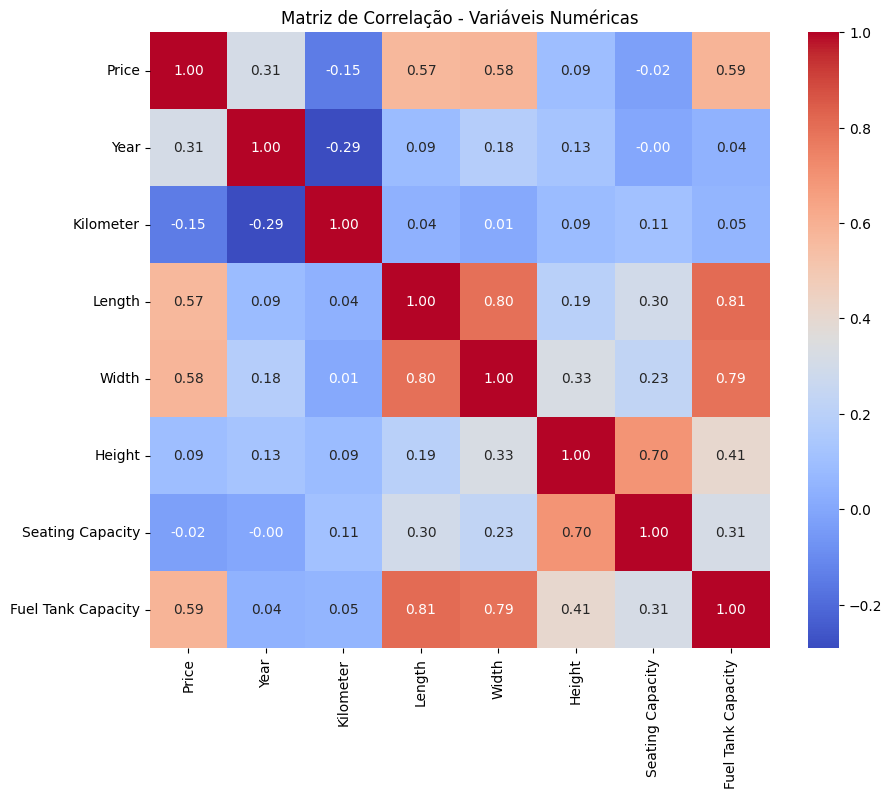

In [11]:
# Matriz de correlação
correlacao = df_numerico.corr()

# Visualização
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()

### Exemplos de correlação extraídos da matriz:

- **Correlação positiva**:
  - `Length` e `Width` → ρ ≈ 0.80
    Carros mais compridos tendem a ser também mais largos.
  
- **Correlação negativa**:
  - `Kilometer` e `Price` → ρ ≈ -0.15  
    Quanto maior a quilometragem, menor tende a ser o preço do carro.

- **Correlação neutra (ou fraca)**:
  - `Fuel Tank Capacity` e `Year` → ρ ≈ 0.05  
    A capacidade do tanque de combustível tem um correlação maneirada conforme o ano de lançamento.




---



🔎 8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis
numéricas em relação à variável de interesse Price.

In [12]:
colunas_numericas_out_price = ['Year', 'Kilometer', 'Length', 'Width', 'Height',
                     'Seating Capacity', 'Fuel Tank Capacity']

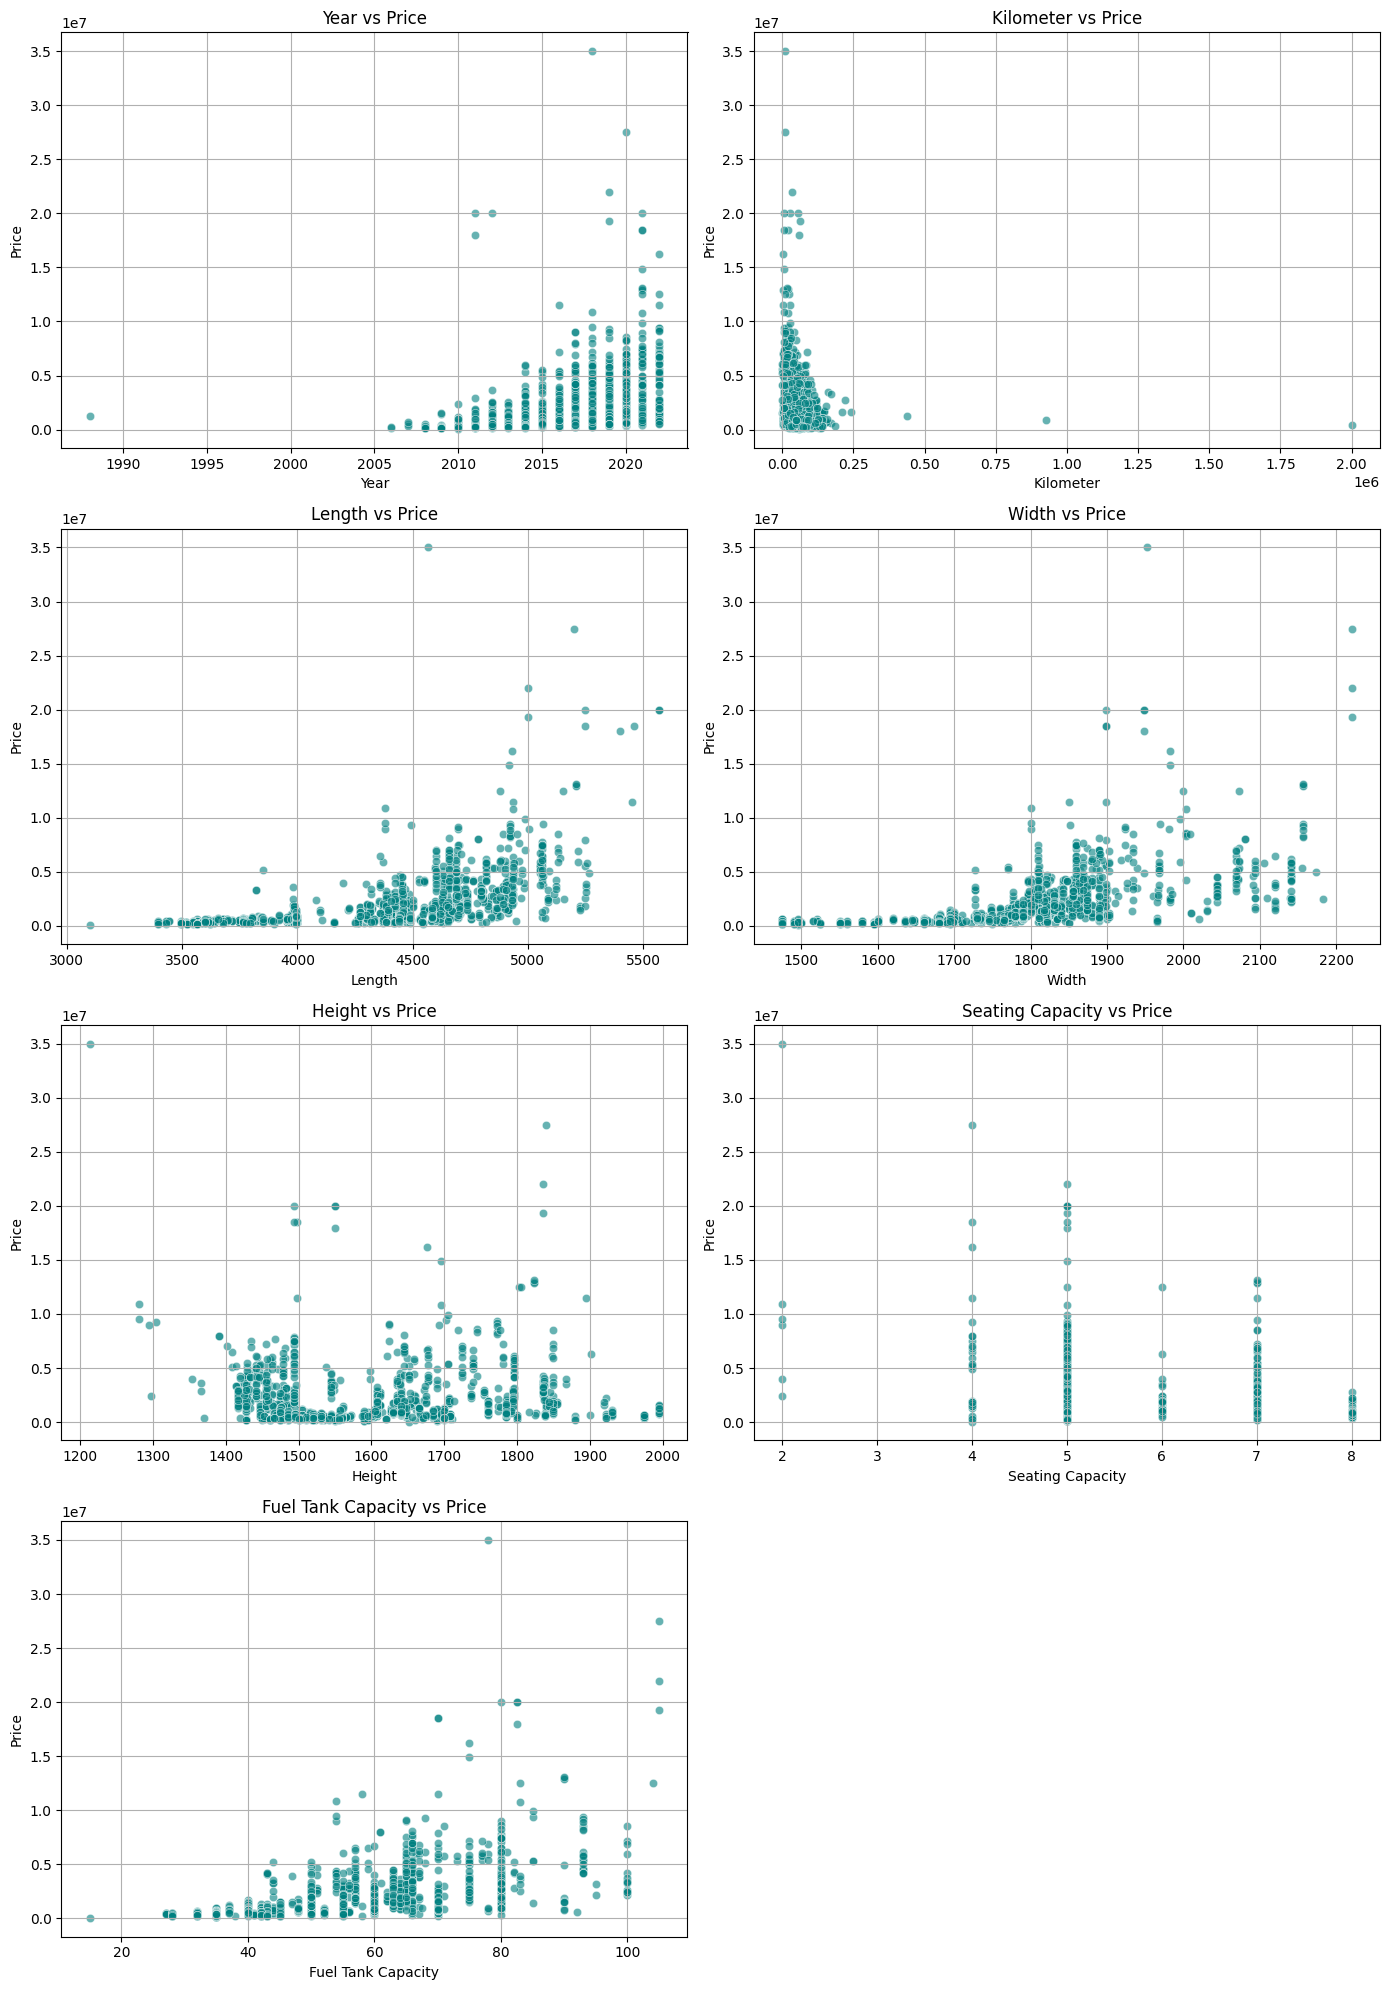

In [15]:
import math

num_graficos = len(colunas_numericas_out_price)
num_linhas = math.ceil(num_graficos / 2)  # 2 gráficos por linha

fig, axes = plt.subplots(num_linhas, 2, figsize=(14, 5 * num_linhas))
axes = axes.flatten()  # Deixa o array 2D em 1D para iterar mais facilmente

for i, var in enumerate(colunas_numericas_out_price):
    sns.scatterplot(data=df, x=var, y='Price', color='teal', alpha=0.6, ax=axes[i])
    axes[i].set_title(f'{var} vs Price')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Price')
    axes[i].grid(True)

# Caso o número de colunas seja ímpar, esconder o subplot extra
if len(colunas_numericas_out_price) % 2 != 0:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


### Observações com base nos gráficos de dispersão:

- `Year` vs `Price`: é possível observar uma tendência de que carros mais novos possuem preços mais elevados.
- `Kilometer` vs `Price`: padrão inverso, indicando que veículos com mais quilômetros rodados tendem a ter preços menores.
- `Height` vs `Price`: não há um padrão claro, sugerindo baixa correlação entre altura do veículo e preço.




---



🔎 9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.

In [19]:
import statsmodels.api as sm

# 1. Selecionar X (variável independente) e y (Price)
X = df['Year']
y = df['Price']

# 2. Adicionar constante (intercepto) para o modelo
X_const = sm.add_constant(X)

# 3. Criar e ajustar o modelo
modelo = sm.OLS(y, X_const).fit()

# 4. Exibir a tabela de regressão
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     198.1
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           7.48e-43
Time:                        19:05:55   Log-Likelihood:                -30115.
No. Observations:                1874   AIC:                         6.023e+04
Df Residuals:                    1872   BIC:                         6.025e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.806e+08   3.43e+07    -14.026      0.0

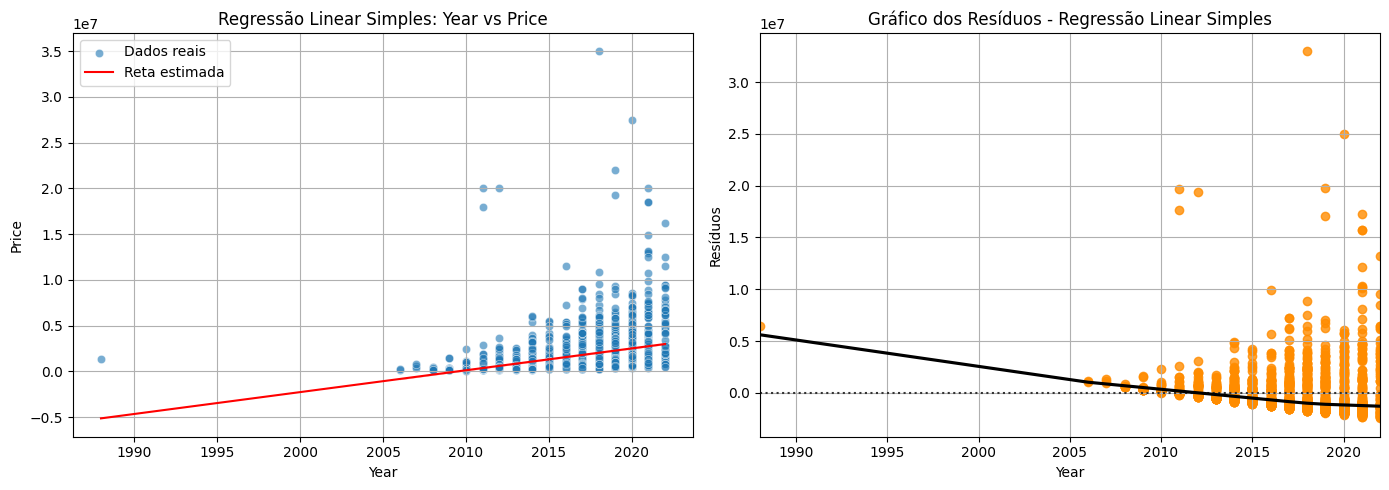

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 linha, 2 colunas

# Gráfico da Regressão Linear
sns.scatterplot(x=X, y=y, alpha=0.6, label='Dados reais', ax=axes[0])
sns.lineplot(x=X, y=modelo.fittedvalues, color='red', label='Reta estimada', ax=axes[0])
axes[0].set_title('Regressão Linear Simples: Year vs Price')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Price')
axes[0].legend()
axes[0].grid(True)

# Gráfico dos Resíduos
sns.residplot(x=X, y=y, lowess=True, color='darkorange', line_kws={'color': 'black'}, ax=axes[1])
axes[1].set_title('Gráfico dos Resíduos - Regressão Linear Simples')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Resíduos')
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [17]:
X = df['Kilometer']
y = df['Price']

X_const = sm.add_constant(X)
modelo = sm.OLS(y, X_const).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     41.50
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           1.49e-10
Time:                        19:05:27   Log-Likelihood:                -30189.
No. Observations:                1874   AIC:                         6.038e+04
Df Residuals:                    1872   BIC:                         6.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.041e+06   7.48e+04     27.302      0.0

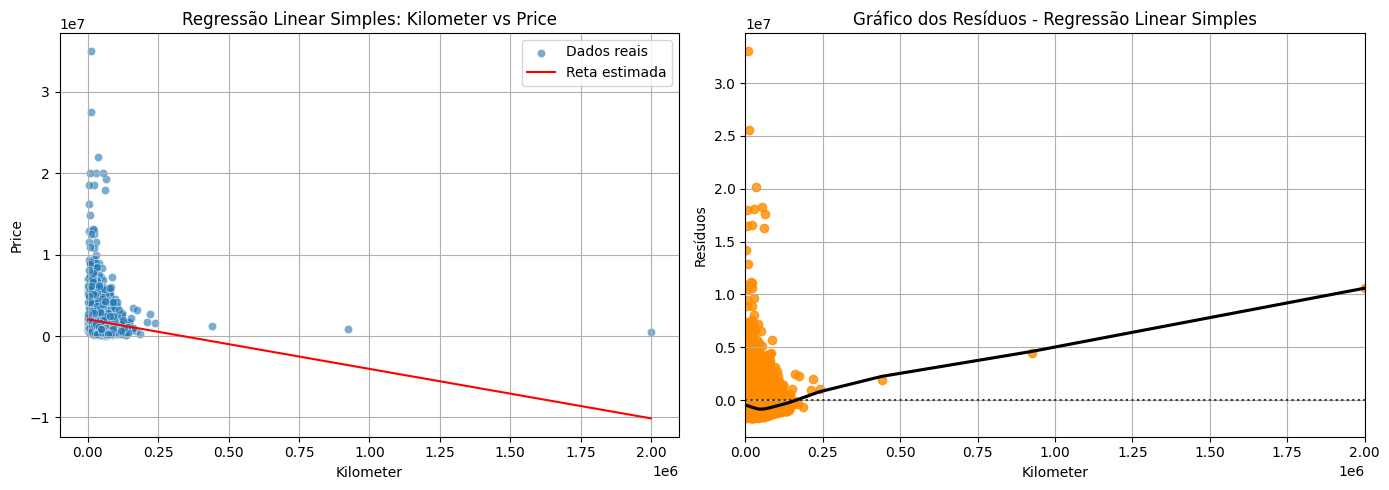

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 linha, 2 colunas

# Gráfico da Regressão Linear
sns.scatterplot(x=X, y=y, alpha=0.6, label='Dados reais', ax=axes[0])
sns.lineplot(x=X, y=modelo.fittedvalues, color='red', label='Reta estimada', ax=axes[0])
axes[0].set_title('Regressão Linear Simples: Kilometer vs Price')
axes[0].set_xlabel('Kilometer')
axes[0].set_ylabel('Price')
axes[0].legend()
axes[0].grid(True)

# Gráfico dos Resíduos
sns.residplot(x=X, y=y, lowess=True, color='darkorange', line_kws={'color': 'black'}, ax=axes[1])
axes[1].set_title('Gráfico dos Resíduos - Regressão Linear Simples')
axes[1].set_xlabel('Kilometer')
axes[1].set_ylabel('Resíduos')
axes[1].grid(True)

plt.tight_layout()
plt.show()



In [11]:
X = df['Height']
y = df['Price']

X_const = sm.add_constant(X)
modelo = sm.OLS(y, X_const).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     16.32
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           5.56e-05
Time:                        18:42:01   Log-Likelihood:                -30202.
No. Observations:                1874   AIC:                         6.041e+04
Df Residuals:                    1872   BIC:                         6.042e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.438e+05   6.61e+05     -1.427      0.1

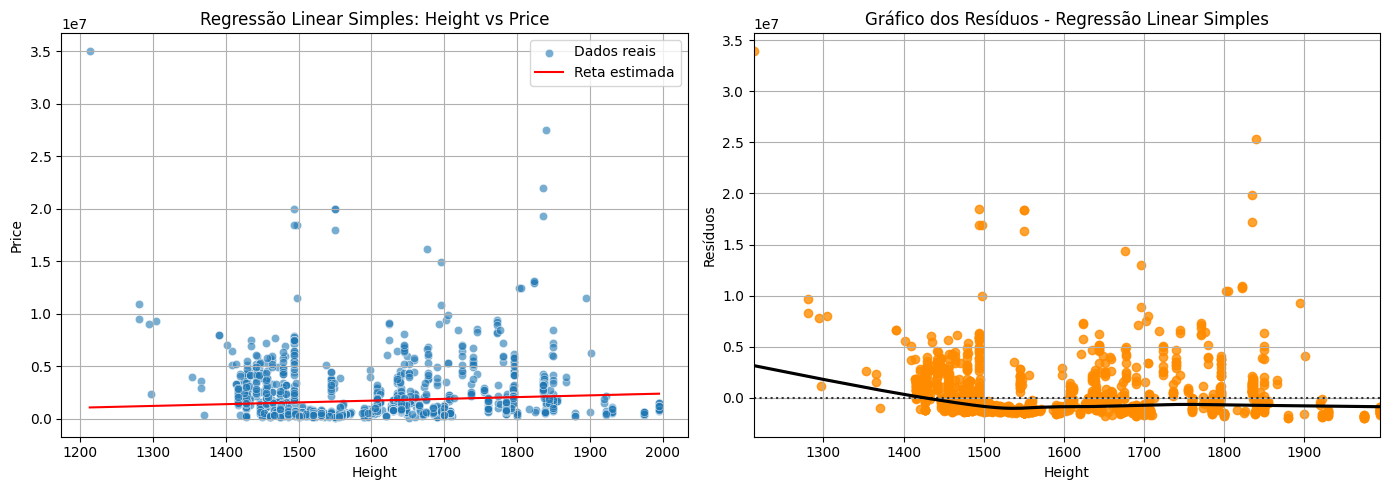

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 linha, 2 colunas

# Gráfico da Regressão Linear
sns.scatterplot(x=X, y=y, alpha=0.6, label='Dados reais', ax=axes[0])
sns.lineplot(x=X, y=modelo.fittedvalues, color='red', label='Reta estimada', ax=axes[0])
axes[0].set_title('Regressão Linear Simples: Height vs Price')
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Price')
axes[0].legend()
axes[0].grid(True)

# Gráfico dos Resíduos
sns.residplot(x=X, y=y, lowess=True, color='darkorange', line_kws={'color': 'black'}, ax=axes[1])
axes[1].set_title('Gráfico dos Resíduos - Regressão Linear Simples')
axes[1].set_xlabel('Height')
axes[1].set_ylabel('Resíduos')
axes[1].grid(True)

plt.tight_layout()
plt.show()




---



🔎 10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.



---



🔎 11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

In [21]:
# 1. Selecionar variáveis
X_multivariada = df[['Year', 'Kilometer', 'Length', 'Width', 'Height']]
y = df['Price']

# 2. Adicionar constante para o intercepto
X_const_multi = sm.add_constant(X_multivariada)

# 3. Treinar o modelo
modelo_multi = sm.OLS(y, X_const_multi).fit()

# 4. Exibir tabela de regressão
print(modelo_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     286.4
Date:                Thu, 26 Jun 2025   Prob (F-statistic):          8.68e-228
Time:                        19:07:33   Log-Likelihood:                -29676.
No. Observations:                1874   AIC:                         5.936e+04
Df Residuals:                    1868   BIC:                         5.940e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.398e+08    2.9e+07    -11.703      0.0

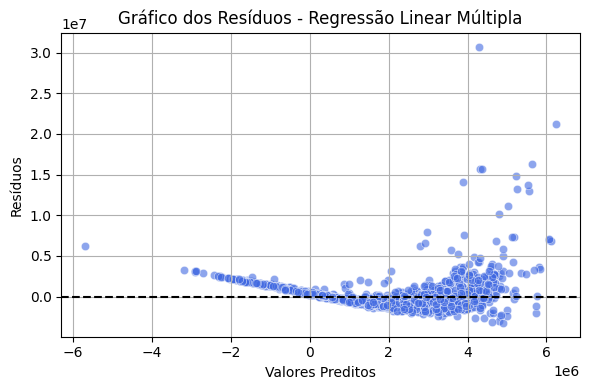

In [22]:
residuos_multi = modelo_multi.resid
valores_previstos = modelo_multi.fittedvalues

plt.figure(figsize=(6, 4))
sns.scatterplot(x=valores_previstos, y=residuos_multi, alpha=0.6, color='royalblue')
plt.axhline(0, linestyle='--', color='black')
plt.title('Gráfico dos Resíduos - Regressão Linear Múltipla')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.grid(True)
plt.tight_layout()
plt.show()